### t2.micro, AWS Marketplace -> Anaconda with Python 3

### 1) Missing Value Ratio

In [13]:
import numpy as np
x = np.random.randint(low=0, high=10, size=2000)
print('Percentage of data missing from column: {:.0%}'.format(np.sum((x < 1).astype(np.float))/len(x)))

Percentage of data missing from column: 9%


### 2) Low Variance Filter

In [27]:
import numpy as np
x = np.random.randint(low=0, high=10, size=2000)
print('Variance of column: {:.0f}'.format(np.var(x)))

Variance of column: 8


### 3) High Correlation Filter

In [1]:
from scipy.stats import pearsonr
import numpy as np
x = np.random.normal(size=100)
y = np.random.normal(size=100)
print('Correlation of columns: {:.5f}'.format(pearsonr(x, y)[0]))

Correlation of columns: 0.06744


### 4) Random Forest

Text(0.5, 0, 'Relative Importance')

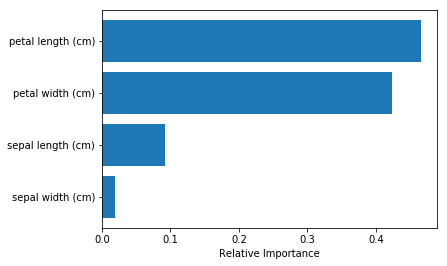

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

iris        = load_iris()
importances = RandomForestClassifier(n_estimators=100).fit(iris.data, iris.target).feature_importances_
indices     = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [iris.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

### 5) Backward Feature Elimination

In [7]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

x, y = make_friedman1()
print(RFE(SVR(kernel="linear")).fit(x, y).ranking_)

[1 1 5 1 1 6 1 2 3 4]


### 6) Factor Analysis (FA)

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis

iris   = load_iris()
factor = FactorAnalysis(n_components=4).fit(iris.data)

print(pd.DataFrame(factor.components_, columns=iris.feature_names))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.706989         -0.158005           1.654236           0.70085
1           0.115161          0.159635          -0.044321          -0.01403
2          -0.000000          0.000000           0.000000           0.00000
3          -0.000000          0.000000           0.000000          -0.00000


### 7) Principle Component Analysis (PCA)

In [9]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=3).fit(np.random.uniform(size=(50, 5)))
print('Variance preserved from the full dataset: {:.0%}'.format(np.sum(pca.explained_variance_ratio_)))

Variance preserved from the full dataset: 70%


### 8) Independent Component Analysis (ICA)

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import FastICA

iris   = load_iris()
ica    = FastICA(n_components=4).fit(iris.data)

print(pd.DataFrame(ica.components_, columns=iris.feature_names))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.018926         -0.002844           0.047912          0.013574
1          -0.053765          0.241513           0.081348         -0.075538
2          -0.033763          0.031796           0.192173         -0.416401
3           0.254632         -0.121942          -0.146571          0.081136


### 9) t-Distributed Stochastic Neighbor Embedding (tSNE)

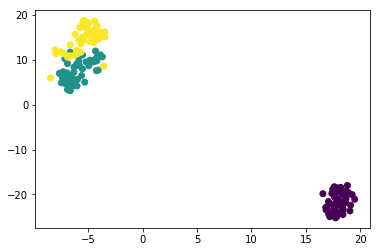

In [12]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

iris = load_iris()
tsne = TSNE().fit_transform(iris.data)
plt.scatter(tsne[:, 0], tsne[:, 1], c=iris.target)

### 10) Linear Discriminant Analysis (LDA)

In [13]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

x   = np.random.uniform(size=(2000, 5))
y   = np.random.randint(low=0, high=10, size=2000)
lda = LinearDiscriminantAnalysis(n_components=3).fit(x, y)
print('Variance preserved from the full dataset: {:.0%}'.format(np.sum(lda.explained_variance_ratio_)))

Variance preserved from the full dataset: 90%
